Processing Text log: ../logs/training_logs/train_text_500.txt


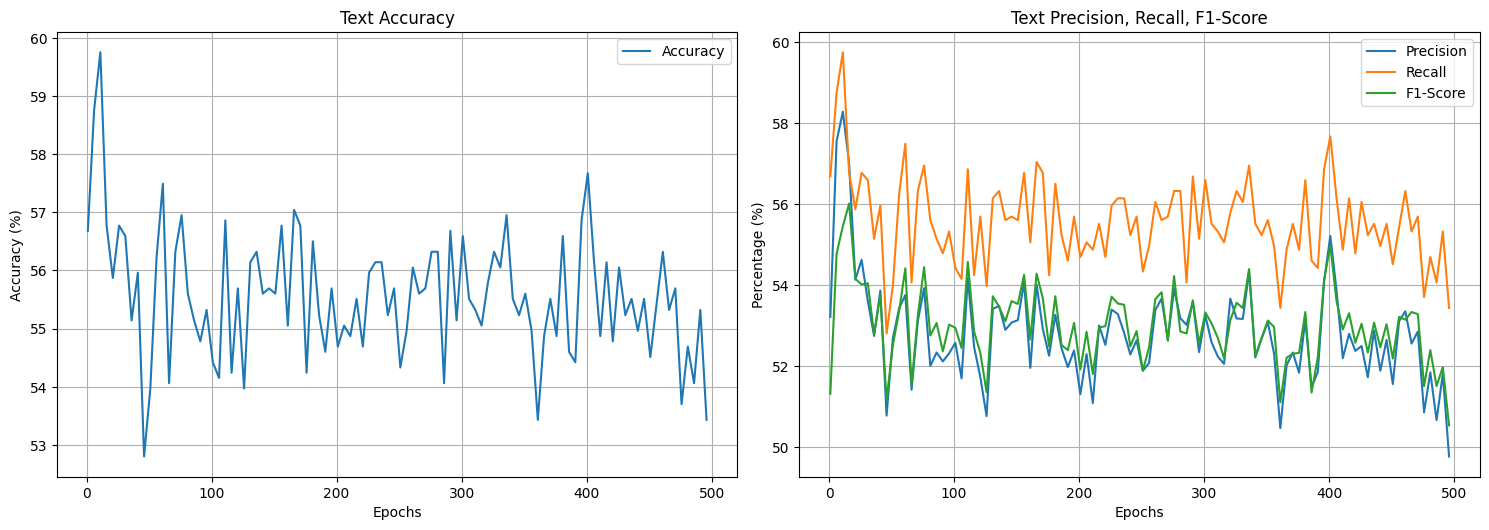




Processing Audio log: ../logs/training_logs/train_audio_500.txt


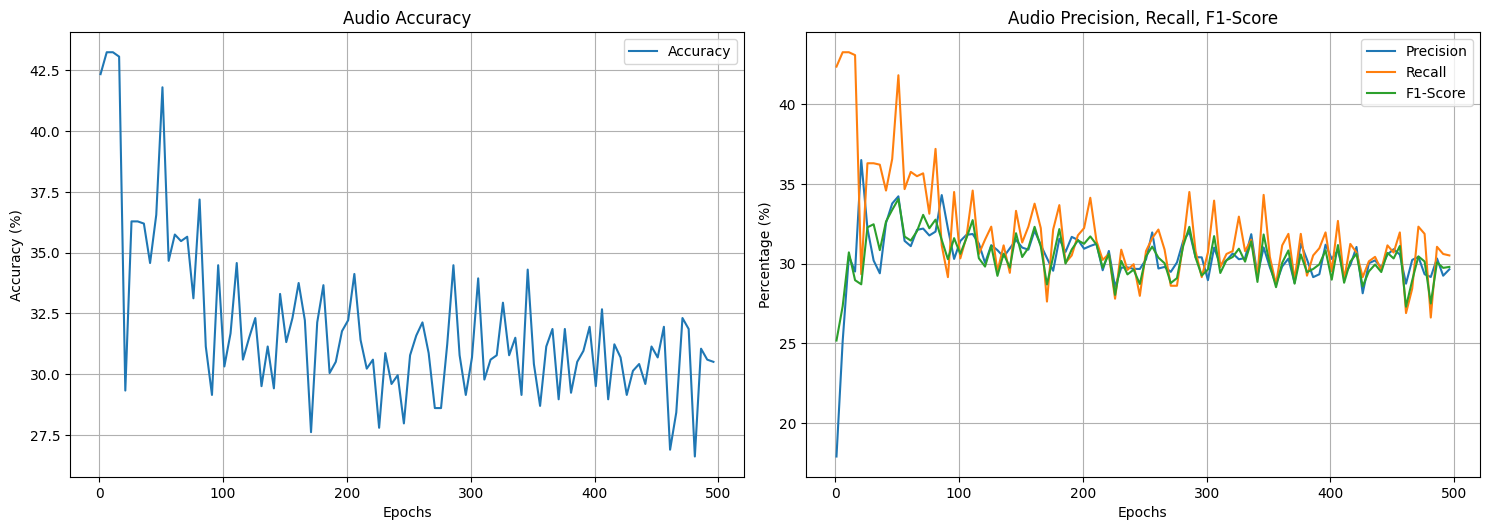




Processing Video log: ../logs/training_logs/train_video_500.txt


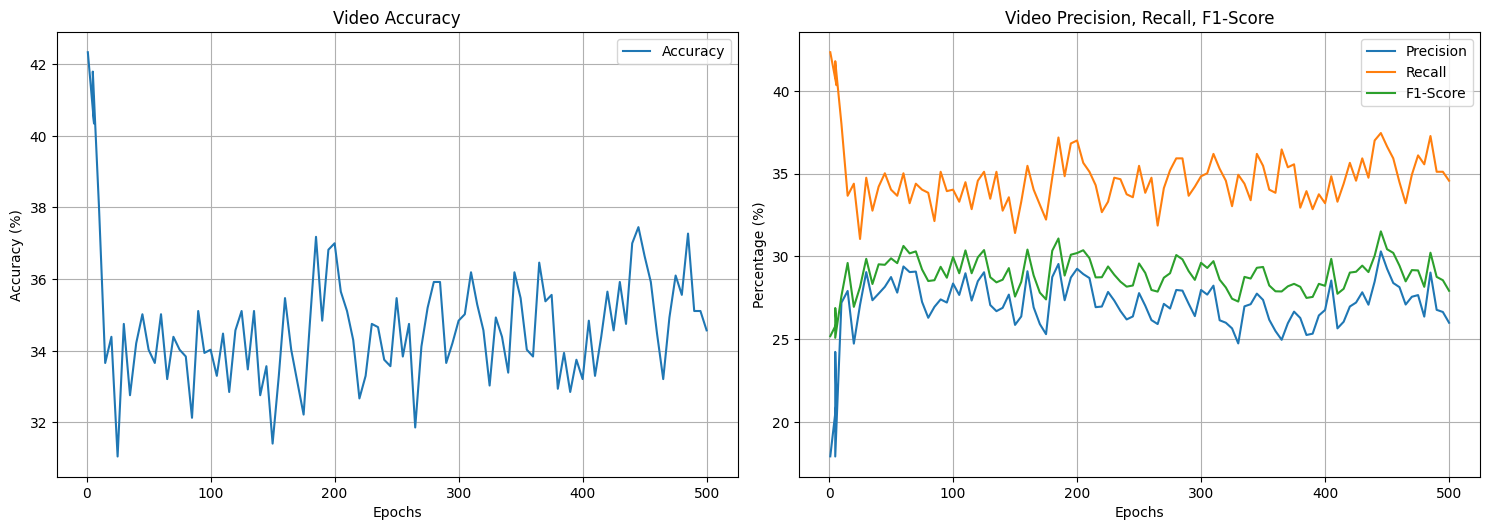

In [8]:
import matplotlib.pyplot as plt

def parse_log_file(file_path):
    """
    Parse a log file to extract training metrics.
    Args:
        file_path (str): Path to the log file.
    Returns:
        dict: Parsed metrics (train_loss, val_loss, accuracy, precision, recall, f1_score).
    """
    epochs, train_loss, val_loss, accuracy, precision, recall, f1_score = [], [], [], [], [], [], []
    with open(file_path, "r") as file:
        for line in file:
            if "Epoch" in line and "Train Loss" in line:  # Ensure the line contains valid metrics
                try:
                    # Split the line into components
                    parts = line.strip().split(", ")
                    epoch = int(parts[0].split("Epoch ")[1].split(":")[0].strip())
                    train_loss_val = float(parts[0].split("Train Loss = ")[1].strip())
                    val_loss_val = float(parts[1].split("Val Loss = ")[1].strip())
                    accuracy_val = float(parts[2].split("Val Accuracy = ")[1].replace("%", "").strip())
                    precision_val = float(parts[3].split("Precision = ")[1].replace("%", "").strip())
                    recall_val = float(parts[4].split("Recall = ")[1].replace("%", "").strip())
                    f1_val = float(parts[5].split("F1 = ")[1].replace("%", "").strip())

                    # Append parsed values
                    epochs.append(epoch)
                    train_loss.append(train_loss_val)
                    val_loss.append(val_loss_val)
                    accuracy.append(accuracy_val)
                    precision.append(precision_val)
                    recall.append(recall_val)
                    f1_score.append(f1_val)
                except (IndexError, ValueError) as e:
                    print(f"Skipping malformed line: {line.strip()} - Error: {str(e)}")
    return {
        "epochs": epochs,
        "train_loss": train_loss,
        "val_loss": val_loss,
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1_score,
    }



def plot_metrics(metrics, title_prefix=""):
    """
    Plot metrics from the parsed log file, skipping points to reduce clutter.
    Args:
        metrics (dict): Parsed metrics dictionary.
        title_prefix (str): Prefix for plot titles.
    """
    epochs = metrics["epochs"]
    skip = 5  # Skip points to reduce clutter

    # Apply skipping logic to metrics
    epochs = epochs[::skip]
    train_loss = metrics["train_loss"][::skip]
    val_loss = metrics["val_loss"][::skip]
    accuracy = metrics["accuracy"][::skip]
    precision = metrics["precision"][::skip]
    recall = metrics["recall"][::skip]
    f1_score = metrics["f1_score"][::skip]

    plt.figure(figsize=(15, 10))


    # Accuracy
    plt.subplot(2, 2, 1)
    plt.plot(epochs, accuracy, label="Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy (%)")
    plt.title(f"{title_prefix} Accuracy")
    plt.legend()
    plt.grid()

    # Precision, Recall, F1-Score
    plt.subplot(2, 2, 2)
    plt.plot(epochs, precision, label="Precision")
    plt.plot(epochs, recall, label="Recall")
    plt.plot(epochs, f1_score, label="F1-Score")
    plt.xlabel("Epochs")
    plt.ylabel("Percentage (%)")
    plt.title(f"{title_prefix} Precision, Recall, F1-Score")
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()


# File paths
file_paths = {
    "Text": "../logs/training_logs/train_text_500.txt",
    "Audio": "../logs/training_logs/train_audio_500.txt",
    "Video": "../logs/training_logs/train_video_500.txt",
}

for modality, file_path in file_paths.items():
    print(f"Processing {modality} log: {file_path}")
    metrics = parse_log_file(file_path)
    plot_metrics(metrics, title_prefix=modality)
    print("\n\n")


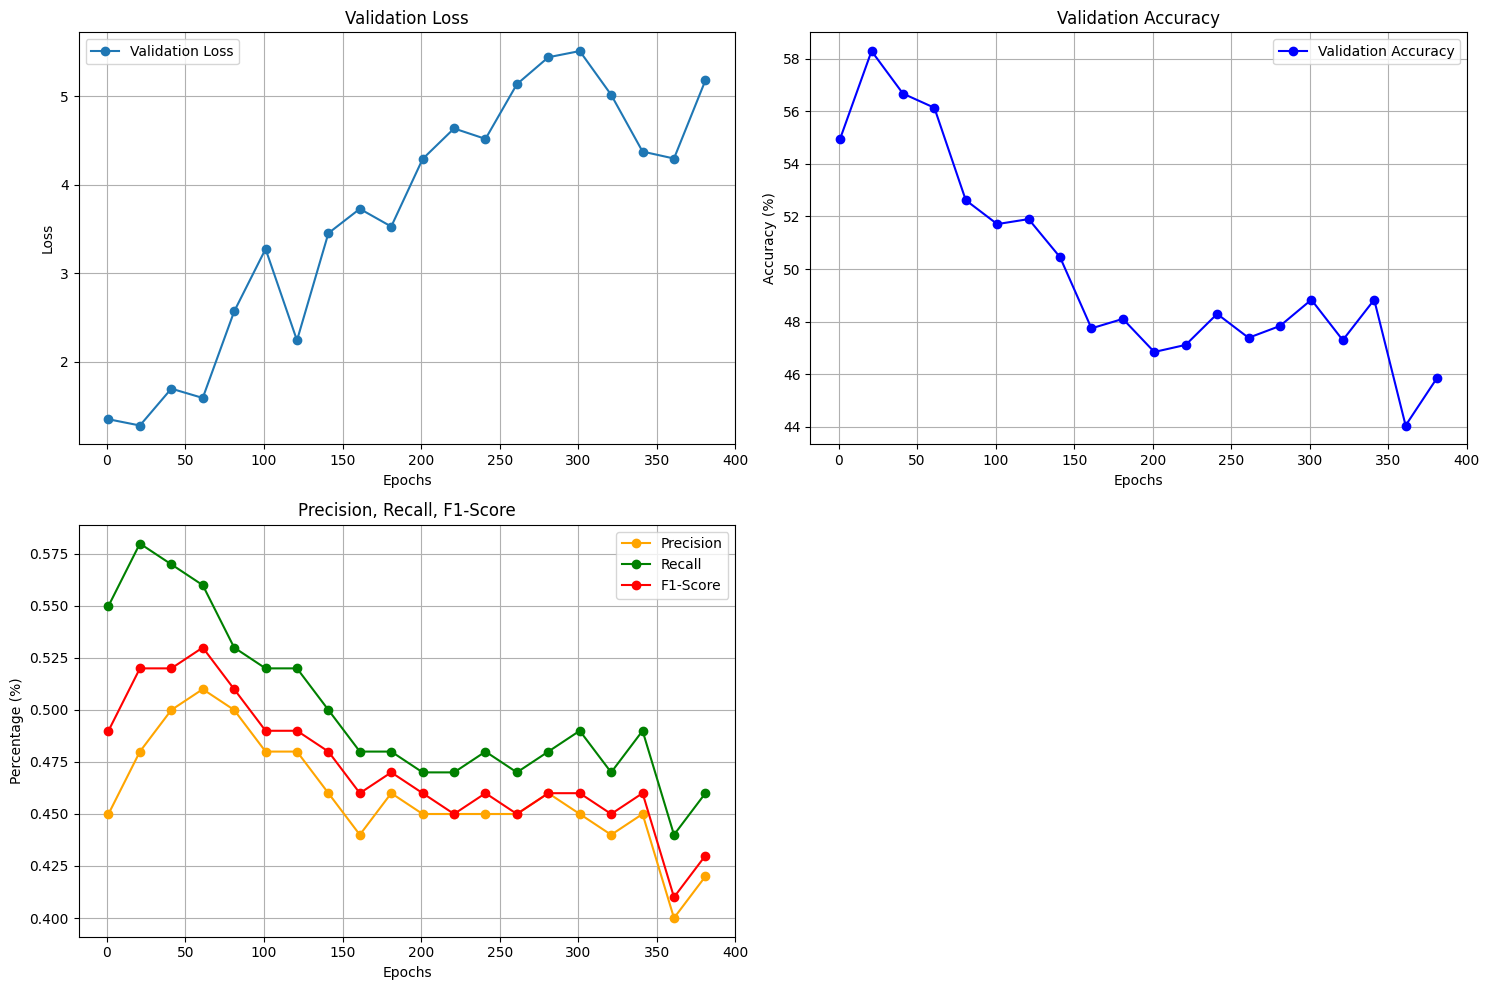

In [9]:
def process_and_plot_log(file_path, max_points=100, skip=5):
    """
    Process the log file, number missing epochs, extract metrics, and plot graphs.
    Args:
        file_path (str): Path to the log file.
        max_points (int): Maximum number of data points to retain for visualization.
        skip (int): Number of points to skip for reducing clutter in the graph.
    """
    # Initialize variables
    epochs, val_loss, accuracy, precision, recall, f1_score = [], [], [], [], [], []
    current_epoch = 1  # Start numbering epochs from 1

    with open(file_path, "r") as file:
        for line in file:
            if "Epoch" in line:
                # Extract the epoch number from the line
                current_epoch = int(line.split("Epoch ")[1].split("/")[0].strip())
            else:
                # Assign a new epoch number if missing
                current_epoch += 1

            try:
                # Extract metrics from the line
                parts = line.strip().split(", ")
                val_loss_val = float(parts[0].split("Validation Loss: ")[1].strip())
                accuracy_val = float(parts[1].split("Validation Accuracy: ")[1].replace("%", "").strip())
                precision_val = float(parts[2].split("Precision: ")[1].strip())
                recall_val = float(parts[3].split("Recall: ")[1].strip())
                f1_val = float(parts[4].split("F1: ")[1].strip())

                # Append to the lists
                epochs.append(current_epoch)
                val_loss.append(val_loss_val)
                accuracy.append(accuracy_val)
                precision.append(precision_val)
                recall.append(recall_val)
                f1_score.append(f1_val)
            except (IndexError, ValueError) as e:
                print(f"Skipping malformed line: {line.strip()} - Error: {str(e)}")

    # Limit data points to max_points
    if len(epochs) > max_points:
        indices = list(range(0, len(epochs), len(epochs) // max_points))[:max_points]
        epochs = [epochs[i] for i in indices]
        val_loss = [val_loss[i] for i in indices]
        accuracy = [accuracy[i] for i in indices]
        precision = [precision[i] for i in indices]
        recall = [recall[i] for i in indices]
        f1_score = [f1_score[i] for i in indices]

    # Skip points for plotting
    epochs = epochs[::skip]
    val_loss = val_loss[::skip]
    accuracy = accuracy[::skip]
    precision = precision[::skip]
    recall = recall[::skip]
    f1_score = f1_score[::skip]

    # Plot graphs
    import matplotlib.pyplot as plt

    plt.figure(figsize=(15, 10))

    # Validation Loss
    plt.subplot(2, 2, 1)
    plt.plot(epochs, val_loss, label="Validation Loss", marker="o")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Validation Loss")
    plt.legend()
    plt.grid()

    # Accuracy
    plt.subplot(2, 2, 2)
    plt.plot(epochs, accuracy, label="Validation Accuracy", marker="o", color="blue")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy (%)")
    plt.title("Validation Accuracy")
    plt.legend()
    plt.grid()

    # Precision, Recall, F1-Score
    plt.subplot(2, 2, 3)
    plt.plot(epochs, precision, label="Precision", marker="o", color="orange")
    plt.plot(epochs, recall, label="Recall", marker="o", color="green")
    plt.plot(epochs, f1_score, label="F1-Score", marker="o", color="red")
    plt.xlabel("Epochs")
    plt.ylabel("Percentage (%)")
    plt.title("Precision, Recall, F1-Score")
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()


# Example usage:
# Replace 'log_file.txt' with the path to your actual log file.
process_and_plot_log("../logs/training_logs/coattention_500.txt", max_points=100, skip=5)


**Bi-GRU & Co-Attention**

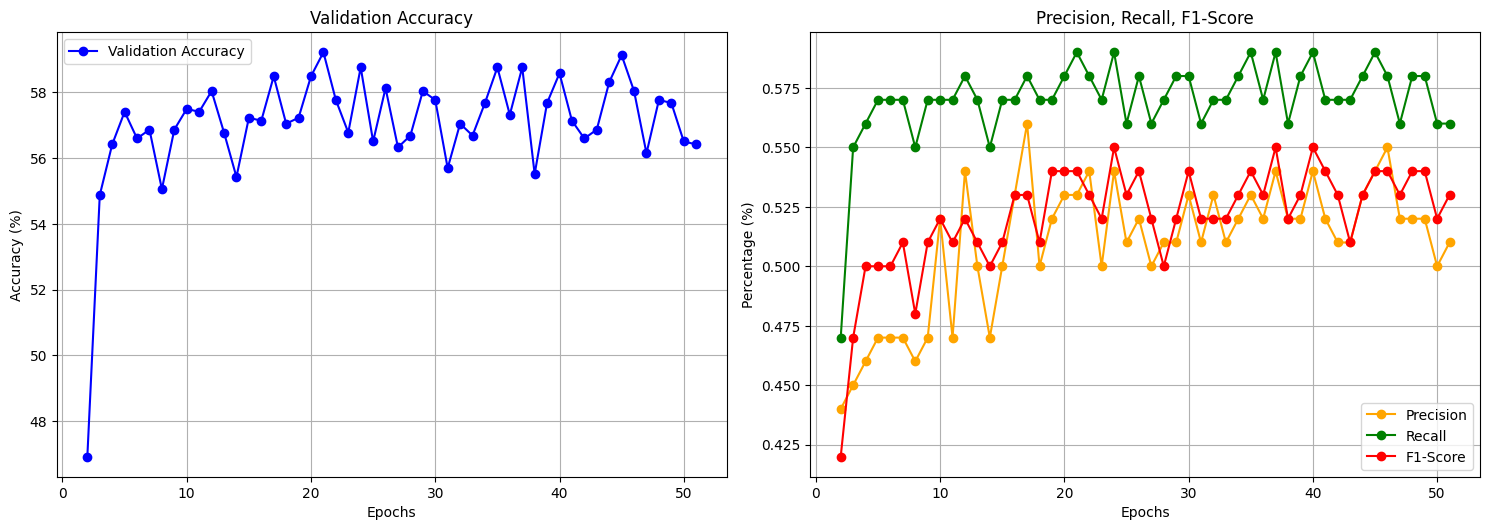

In [11]:
def process_and_plot_log(file_path, max_points=50):
    """
    Process the log file, number missing epochs, extract metrics, and plot graphs.
    Args:
        file_path (str): Path to the log file.
        max_points (int): Maximum number of epochs to display.
    """
    # Initialize variables
    epochs, val_loss, accuracy, precision, recall, f1_score = [], [], [], [], [], []
    current_epoch = 1  # Start numbering epochs from 1

    with open(file_path, "r") as file:
        for line in file:
            if "Epoch" in line:
                # Extract the epoch number from the line
                current_epoch = int(line.split("Epoch ")[1].split("/")[0].strip())
            else:
                # Assign a new epoch number if missing
                current_epoch += 1

            try:
                # Extract metrics from the line
                parts = line.strip().split(", ")
                val_loss_val = float(parts[0].split("Validation Loss: ")[1].strip())
                accuracy_val = float(parts[1].split("Validation Accuracy: ")[1].replace("%", "").strip())
                precision_val = float(parts[2].split("Precision: ")[1].strip())
                recall_val = float(parts[3].split("Recall: ")[1].strip())
                f1_val = float(parts[4].split("F1: ")[1].strip())

                # Append to the lists
                epochs.append(current_epoch)
                val_loss.append(val_loss_val)
                accuracy.append(accuracy_val)
                precision.append(precision_val)
                recall.append(recall_val)
                f1_score.append(f1_val)
            except (IndexError, ValueError) as e:
                print(f"Skipping malformed line: {line.strip()} - Error: {str(e)}")

    # Limit data points to max_points
    if len(epochs) > max_points:
        epochs = epochs[:max_points]
        val_loss = val_loss[:max_points]
        accuracy = accuracy[:max_points]
        precision = precision[:max_points]
        recall = recall[:max_points]
        f1_score = f1_score[:max_points]

    # Plot graphs
    import matplotlib.pyplot as plt

    plt.figure(figsize=(15, 10))



    # Accuracy
    plt.subplot(2, 2, 1)
    plt.plot(epochs, accuracy, label="Validation Accuracy", marker="o", color="blue")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy (%)")
    plt.title("Validation Accuracy")
    plt.legend()
    plt.grid()

    # Precision, Recall, F1-Score
    plt.subplot(2, 2, 2)
    plt.plot(epochs, precision, label="Precision", marker="o", color="orange")
    plt.plot(epochs, recall, label="Recall", marker="o", color="green")
    plt.plot(epochs, f1_score, label="F1-Score", marker="o", color="red")
    plt.xlabel("Epochs")
    plt.ylabel("Percentage (%)")
    plt.title("Precision, Recall, F1-Score")
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()


# Example usage:
# Replace 'log_file.txt' with the path to your actual log file.
process_and_plot_log("../logs/training_logs/bigru_coattention_50.txt", max_points=50)


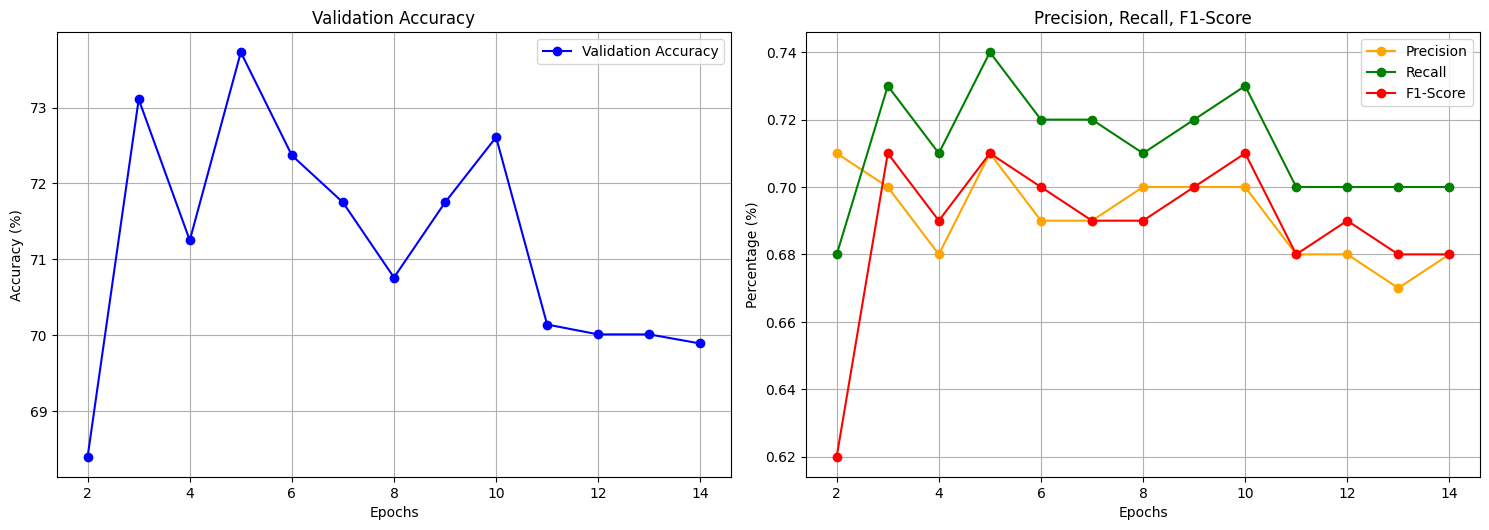

In [12]:
process_and_plot_log("../logs/training_logs/bigru_coattention_4.txt", max_points=20)
